In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
from tkinter import filedialog
import itertools
#from colour import Color
from datetime import date
# import statsmodels.api as sm
# from statsmodels.stats.weightstats import ztest as ztest
# from sklearn.metrics import r2_score as R2S
import cairo

## Names and Palette ##

In [54]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2023-10-10


'2023-10-10'

In [55]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
EBconc = '[EB] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

## Join Data ##

In [86]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [87]:
folders = [x for x in path.iterdir() if x.is_dir()]
folders = [i for i in folders if str(i.stem)[-1] == 'M']
folders

[WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH3_typeWT_DCX60nM'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH4_typeWT_DCX230nM'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH7_typeWT_DCX115nM'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH8_typeWT_DCX30nM')]

In [88]:
files = []
for k in folders:
    files0 = [x for x in k.iterdir() if x.is_file()]
    files0 = [i for i in files0 if str(i).rfind('Results') != -1 if str(i).rfind('csv') != -1]
    files = files + files0
files

[WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH3_typeWT_DCX60nM/Results.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH4_typeWT_DCX230nM/Results.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH7_typeWT_DCX115nM/Results.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH8_typeWT_DCX30nM/Results.csv')]

In [89]:
bkgrnd = []
for k in folders:
    bkgrnd0 = [x for x in k.iterdir() if x.is_file()]
    bkgrnd0 = [i for i in bkgrnd0 if str(i).rfind('background') != -1 if str(i).rfind('csv') != -1]
    bkgrnd = bkgrnd + bkgrnd0
bkgrnd

[WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH3_typeWT_DCX60nM/background.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH4_typeWT_DCX230nM/background.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH7_typeWT_DCX115nM/background.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-09-28_nonSEC-dcxdynWT/CH8_typeWT_DCX30nM/background.csv')]

In [90]:
def findmetadata(tag,end,i):
    n = len(tag)
    locstart = str(i).rfind(tag) 
    locend = str(i).find(end, locstart)
    tag0 = str(i)[locstart+n: locend]
    
    return tag0

In [91]:
dates= []
CH= []
dcx = []
dcxtype= []
for i in files:
    dateloc = str(i).rfind("202")   
    dates0 = str(i)[dateloc : dateloc+10]
    dates = dates + [dates0]

    CH0 = findmetadata("CH",'_',i)
    CH = CH + [CH0]  
    
    type0 = findmetadata("type",'_',i)
    dcxtype = dcxtype + [type0] 
    
    dcx0 = findmetadata("DCX",'nM',i)
    dcx = dcx + [float(dcx0)] 

dates,CH,dcx, dcxtype

(['2023-09-28', '2023-09-28', '2023-09-28', '2023-09-28'],
 ['3', '4', '7', '8'],
 [60.0, 230.0, 115.0, 30.0],
 ['WT', 'WT', 'WT', 'WT'])

## Open Data ##

In [92]:
data = pd.DataFrame(columns=[] , index=[])

for i in np.arange(len(files)):
    data0 = pd.read_csv(files[i], encoding='utf-8',keep_default_na=False)
    dataBkgrnd0 = pd.read_csv(bkgrnd[i], encoding='utf-8',keep_default_na=False)
    data0['Background'] = dataBkgrnd0['Mean'][0]
    data0['Intensity'] = data0['Mean'] - dataBkgrnd0['Mean'][0]
    data0['Date'] = dates[i]
    data0['CH'] = CH[i]
    data0[DCXconc] = dcx[i]
    data0['Type'] = dcxtype[i]
    
    data = pd.concat([data,data0], ignore_index=True)

data = data.sort_values(by = DCXconc)
data

,,Area,Mean,Min,Max,Angle,Length,Background,Intensity,Date,CH,[DCX] $(n M)$,Type
121,30,120,119.767,108,139,-92.386,24.021,104.121,15.646,2023-09-28,8,30.0,WT
93,2,270,129.604,111,144,173.660,54.332,104.121,25.483,2023-09-28,8,30.0,WT
94,3,332,121.078,109,143,-141.746,66.219,104.121,16.957,2023-09-28,8,30.0,WT
95,4,460,119.337,108,140,151.489,92.179,104.121,15.216,2023-09-28,8,30.0,WT
96,5,358,117.827,106,135,-41.035,71.589,104.121,13.706,2023-09-28,8,30.0,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,28,360,186.364,157,211,-30.486,71.946,111.902,74.462,2023-09-28,4,230.0,WT
58,29,466,183.753,135,214,77.305,93.280,111.902,71.851,2023-09-28,4,230.0,WT
59,30,304,180.641,150,216,-66.801,60.926,111.902,68.739,2023-09-28,4,230.0,WT
46,17,376,161.314,130,190,-170.036,75.133,111.902,49.412,2023-09-28,4,230.0,WT


In [93]:
newdirectory = str(path.parents[0])+'//Intensity_Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/Intensity_Data_Sheets')

In [94]:
name = dates[0]+'_Intensity_analysed-on_'+date +'.csv'
name

'2023-09-28_Intensity_analysed-on_2023-10-10.csv'

In [95]:
data.to_csv(path/(name), encoding='utf-8', index=False)
data.to_csv(newmydir/(name), encoding='utf-8', index=False)

## Open prev sevad data ##

In [96]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askFitParam, encoding='utf-8',keep_default_na=False)
data

,,Area,Mean,Min,Max,Angle,Length,Background,Intensity,Date,CH,[DCX] $(n M)$,Type
0,7,266,125.868,113,139,-19.799,53.141,103.607,22.261,2023-10-04,8,30,WT
1,1,265,133.019,117,146,-88.919,53.009,105.673,27.346,2023-10-04,4,30,WT
2,2,112,130.259,116,145,144.162,22.204,105.673,24.586,2023-10-04,4,30,WT
3,3,142,131.901,111,146,-50.711,28.425,105.673,26.228,2023-10-04,4,30,WT
4,5,240,129.912,109,145,153.435,44.721,105.673,24.239,2023-10-04,4,30,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,28,360,186.364,157,211,-30.486,71.946,111.902,74.462,2023-09-28,4,230,WT
358,29,466,183.753,135,214,77.305,93.280,111.902,71.851,2023-09-28,4,230,WT
359,30,304,180.641,150,216,-66.801,60.926,111.902,68.739,2023-09-28,4,230,WT
360,17,376,161.314,130,190,-170.036,75.133,111.902,49.412,2023-09-28,4,230,WT


## Plot ##

In [97]:
grey00 = '#777777'
grey20 = '#C5C5C5'

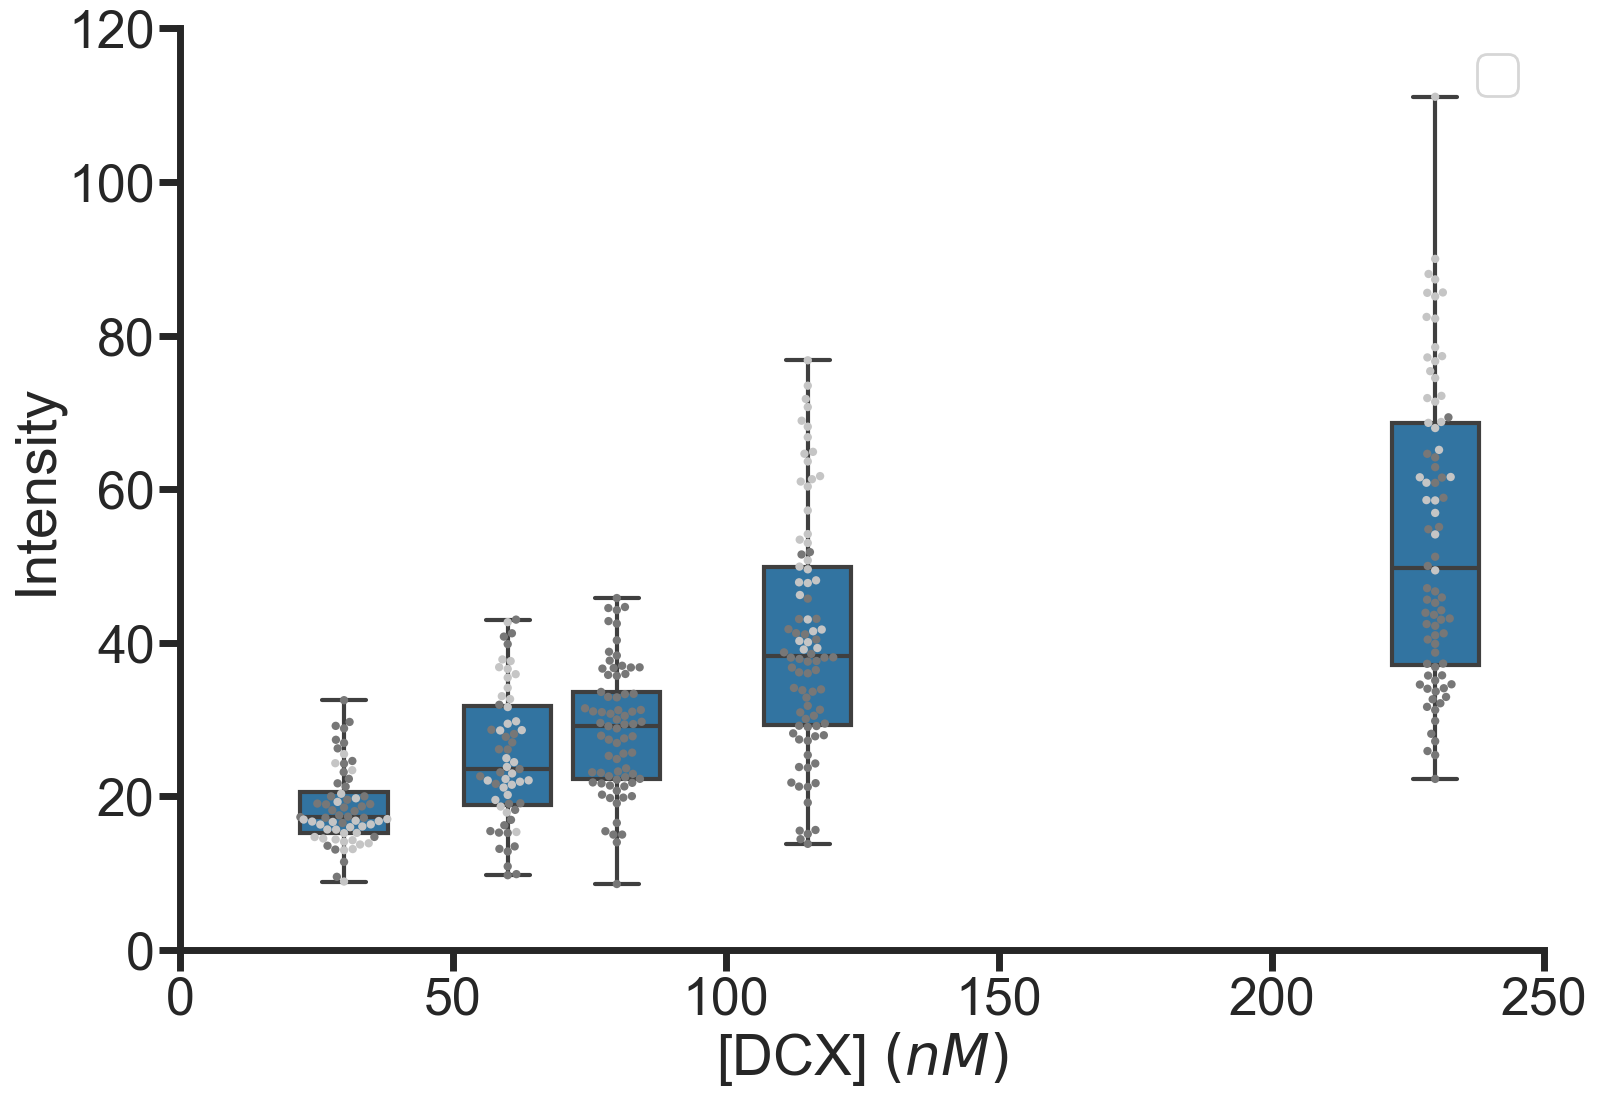

In [113]:
fig, ax = plt.subplots(1,1,figsize=(17,12))

# ax = sns.boxplot(x= DCXconc, y='Mean', data=data, whis=np.inf,linewidth=3,native_scale=True)
# ax = sns.swarmplot(x=DCXconc, y='Mean', data=data, hue='Date', size=5,native_scale=True , palette = [grey00, grey20])

ax = sns.boxplot(x= DCXconc, y='Intensity', data=data, whis=np.inf,linewidth=3,native_scale=True)
ax = sns.swarmplot(x=DCXconc, y='Intensity', data=data, hue='Date', size=6,native_scale=True , palette = [grey00, grey20])

#ax.legend( loc = 'lower right')
ax.legend('')
ax.set_xlabel(DCXconc)

ax.set_xlim(0,120) 
ax.set_ylim(0,120) 
ax.set_xticks(np.arange(0, 251, 50))
sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


plt.savefig(newmydir/('intensity_'+date+'.svg'),backend='Cairo')
plt.savefig(newmydir/('intensity_'+date+'.png'),backend='Cairo')